#Adaptado por Bruno Menezes (https://github.com/brunoleomenezes) e será utilizado apenas para fins acadêmicos.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

### Load dataset

In [2]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


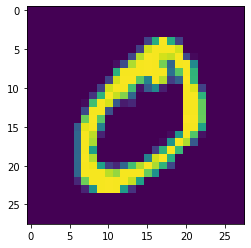

In [3]:
plt.imshow(X_train[1])

In [5]:
#Normalizando a base

X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
# O autoencoder

X_input = tf.keras.layers.Input((28,28,1))
# encoder
X = tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding='same')(X_input)
encoded = tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding='same')(X)
# espaço latente
# decoder
X = tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding='same')(encoded)
X = tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, activation='sigmoid', padding='same')(X)

# Dois modelos
model = tf.keras.models.Model(inputs=X_input, outputs=X)
encoder = tf.keras.models.Model(X_input, encoded)

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 14, 14, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 28, 28, 1)        145       
 ranspose)                                                       
                                                                 
Total params: 2,633
Trainable params: 2,633
Non-trainable p

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
encoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Treino
history = model.fit(X_train, X_train, batch_size=100, validation_split=0.1, epochs=30)

Epoch 1/30
540/540 [==============================] - 14s 5ms/step - loss: 0.0610 - val_loss: 0.0073
Epoch 2/30
540/540 [==============================] - 3s 6ms/step - loss: 0.0070 - val_loss: 0.0067
Epoch 3/30
540/540 [==============================] - 2s 4ms/step - loss: 0.0063 - val_loss: 0.0058
Epoch 4/30
540/540 [==============================] - 2s 4ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 5/30
540/540 [==============================] - 2s 3ms/step - loss: 0.0051 - val_loss: 0.0043
Epoch 6/30
540/540 [==============================] - 2s 3ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 7/30
540/540 [==============================] - 2s 3ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 8/30
540/540 [==============================] - 2s 3ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 9/30
540/540 [==============================] - 2s 3ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 10/30
540/540 [==============================] - 2s 3ms/step - loss: 0.0039 - val_loss: 0.003

In [10]:
# Evolução
print(model.layers[2].get_weights()[1])
print(encoder.layers[2].get_weights()[1])

[ 0.08773712 -0.06308994  0.05029726 -0.21510616 -0.07192852  0.11676512
  0.1802484   0.23914869]
[ 0.08773712 -0.06308994  0.05029726 -0.21510616 -0.07192852  0.11676512
  0.1802484   0.23914869]


In [11]:
# Classificador
X_train_pixels = np.reshape(X_train,(60000, 28*28)) #Linear
X_test_pixels = np.reshape(X_test,(10000, 28*28))
print(X_train_pixels.shape)
print(X_train.shape)
print(X_test_pixels.shape)
print(X_test.shape)

# Poderia ser um KNN
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X_train_pixels, y_train) #Pixels e y
y_train_pred = nb.predict(X_train_pixels)
y_test_pred = nb.predict(X_test_pixels)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

(60000, 784)
(60000, 28, 28)
(10000, 784)
(10000, 28, 28)
0.5649
0.5558


In [12]:
# PCA
from sklearn.decomposition import PCA

X_train_pca = np.reshape(X_train,(60000, 28*28))
X_test_pca = np.reshape(X_test,(10000, 28*28))
pca = PCA(n_components=7*7*8)  # mesmo tamanho que o espaço latente do autoencoder (392)
pca.fit(X_train_pca)
X_train_pca = pca.transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)
print(X_train_pca.shape)
print(y_train.shape)
print(X_test_pca.shape)
print(y_test.shape)

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X_train_pca, y_train)
y_train_pred = nb.predict(X_train_pca)
y_test_pred = nb.predict(X_test_pca)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

(60000, 392)
(60000,)
(10000, 392)
(10000,)
0.76245
0.7658


In [13]:
#Embedding das features
X_train_emb = encoder.predict(X_train)
X_test_emb = encoder.predict(X_test)
print(X_train_emb.shape)
print(y_train.shape)
X_train_emb = np.reshape(X_train_emb, (60000,7*7*8))
X_test_emb = np.reshape(X_test_emb, (10000,7*7*8))
print(X_train_emb.shape)
print(y_train.shape)
print(X_test_emb.shape)
print(y_test.shape)

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X_train_emb, y_train)
y_train_pred = nb.predict(X_train_emb)
y_test_pred = nb.predict(X_test_emb)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

(60000, 7, 7, 8)
(60000,)
(60000, 392)
(60000,)
(10000, 392)
(10000,)
0.6623333333333333
0.6645
